In [31]:
%load_ext autoreload
%autoreload 2
import sys;sys.path.append('modules')
from utils import *

%matplotlib inline    
import matplotlib.pyplot as plt
import bisect

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fill_number = 6711
fill_info = get_fill_info(fill_number)

In [3]:
filename = 'ob/6711/instability_data/06711_Inst_B1H_Q7_20180522_05h07m20s.h5'
alldat = ob_tbt(filename, fill_number)

File at:  2018-05-22 05:07:20  (CET)  2018-05-22 03:07:20+00:00  (UTC)   Status:  [u'STABLE']


# Filling scheme

In [4]:
cals.search('%FILL_PATTERN%')
raw_data =   importData.LHCCals2pd('LHC.BCTFR.A6R4.B1:BUNCH_FILL_PATTERN', fill_number, 'RAMP')
for i in raw_data['LHC.BCTFR.A6R4.B1:BUNCH_FILL_PATTERN'][0:1]:
    bunches = np.where(np.array(i)>0.1)[0]
    print bunches
print len(bunches)

[  37   38   39 ..., 3429 3430 3431]
2556


# frev

In [11]:
modes = ['STABLE']
time = {}
time['STABLE'] = (pd.Timestamp('2018-05-22 03:07:20+00:00'), pd.Timestamp('2018-05-22 03:07:22+00:00') )
df = get_data(modes, time)
frf = df.B1.H.tbt.STABLE['ALB.SR4.B1:FGC_FREQ'].iloc[0]
h = 35640
frev = frf/h
print frev

11245.5031686


# Average over all bunches

In [12]:
data = (np.mean(alldat[:, bunches[:]],axis=1))
print alldat[:].shape
print data.shape


(65536, 3564)
(65536,)


<IPython.core.display.Javascript object>


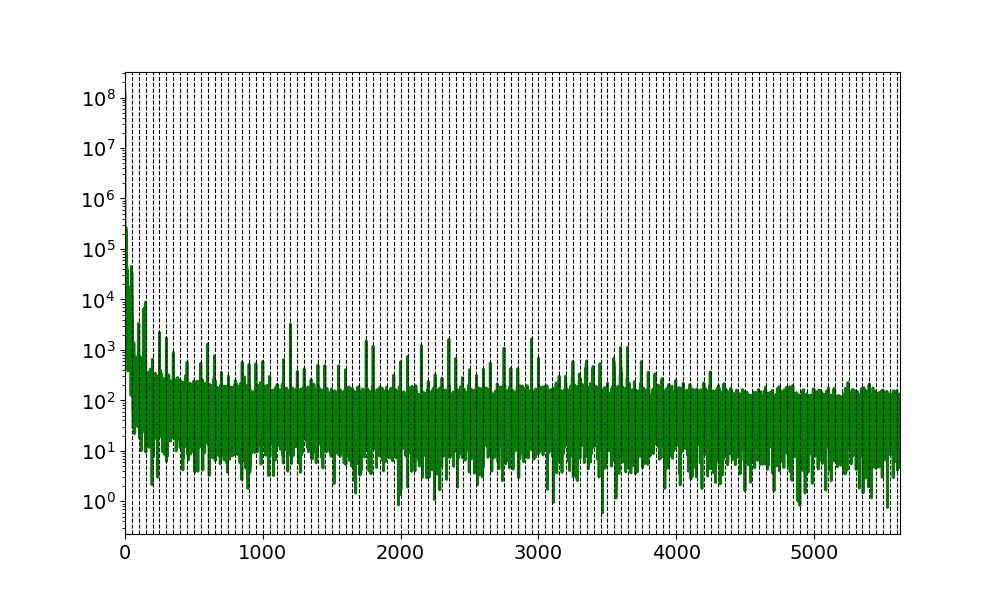

In [68]:
%matplotlib notebook
fourier = np.fft.rfft(data)
freqs = np.fft.rfftfreq(len(fourier)*2-1, 1.0/frev)
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.semilogy(freqs, abs(fourier), c='g')
plt.xlim(0,frev/2.)
for i in range(200):
    plt.axvline(50.*i, c='k', linestyle='--', linewidth=0.8)


<IPython.core.display.Javascript object>


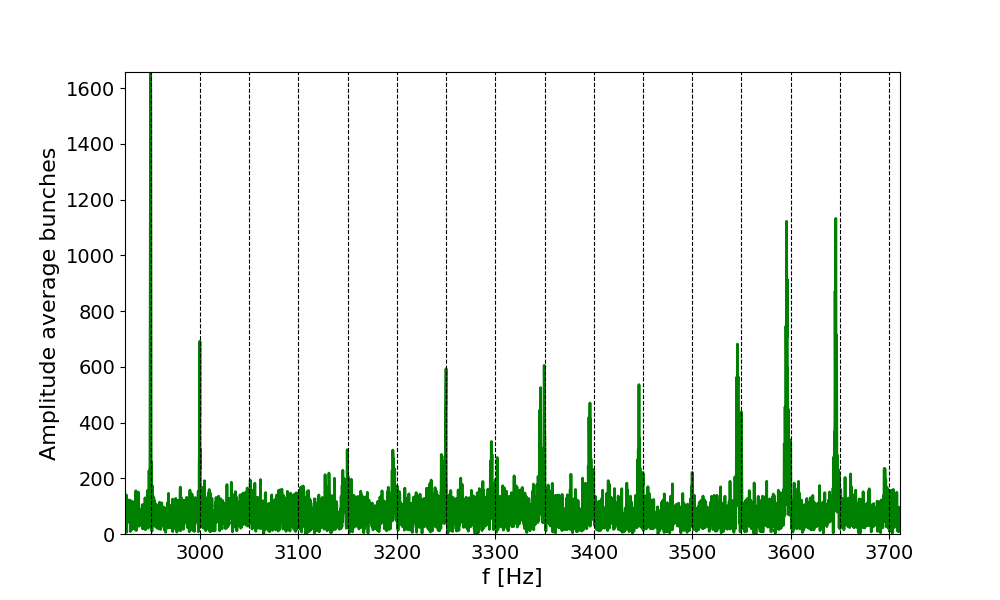

Text(0.5,0,u'f [Hz]')

In [69]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(10,6))
xmin = 0.26*frev; xmax = 0.33*frev
lower_bound_i = bisect.bisect_left(freqs, xmin)
upper_bound_i = bisect.bisect_right(freqs, xmax, lo=lower_bound_i)
yy = abs(fourier)[lower_bound_i:upper_bound_i]
plt.plot(freqs, abs(fourier), c='g')
plt.xlim(0,frev/2.)
for i in range(200):
    plt.axvline(50.*i, c='k', linestyle='--', linewidth=0.8)
plt.xlim(xmin, xmax)
plt.ylim([min(yy), max(yy)])
plt.ylabel('Amplitude average bunches')
plt.xlabel('f [Hz]')

<IPython.core.display.Javascript object>


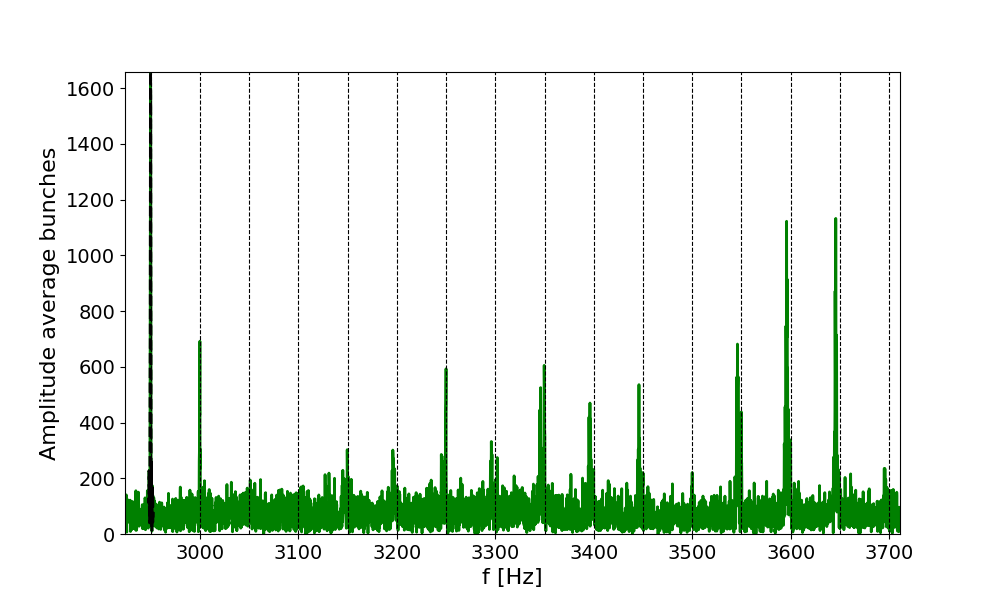

In [70]:
%matplotlib notebook
fig1, ax1 = plt.subplots(figsize=(10,6))
xmin = 0.26*frev; xmax = 0.33*frev
lower_bound_i = bisect.bisect_left(freqs, xmin)
upper_bound_i = bisect.bisect_right(freqs, xmax, lo=lower_bound_i)
yy = abs(fourier)[lower_bound_i:upper_bound_i]
plt.plot(freqs, abs(fourier), c='g')
plt.xlim(0,frev/2.)
for i in range(200):
    plt.axvline(50.*i, c='k', linestyle='--', linewidth=0.8)
plt.xlim(xmin, xmax)
plt.ylim([min(yy), max(yy)])
plt.ylabel('Amplitude average bunches')
plt.xlabel('f [Hz]')

xmin = 2947.5; xmax = 2952.5
myFilter = (freqs>=xmin)&(freqs<=2952.5)
plt.plot(freqs[myFilter],abs(fourier)[myFilter], c='k', linestyle='--')
plt.show()

In [71]:
np.sum(abs(fourier)[myFilter])/len(abs(fourier))

0.30271131093825343